In [169]:
import math
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sn

import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
import pydotplus
from sklearn import tree
from IPython.display import Image

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import mode
from collections import Counter
from scipy import stats
%matplotlib inline

df = pd.read_csv(r'C:\Users\Mario\Desktop\UniPi\1° semestre\Data Mining 1\Datasets\DatasetProject1\df_originale.csv')

df.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,HourlyRate,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,WorkLifeBalance,MonthlyIncome,TrainingTimesLastYear,NumCompaniesWorked,MaritalStatus,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole
0,27.0,Yes,1,Sales,15,2,Medical,59,1,1,...,14,2,4298.0,1.0,6,0,3.0,7,2.0,2
1,30.0,Yes,2,Sales,16,4,Marketing,70,1,1,...,13,3,5304.0,2.0,2,1,4.0,10,8.0,0
2,56.0,No,0,Research & Development,2,4,Technical Degree,60,4,1,...,11,2,6306.0,2.0,2,0,4.0,12,12.0,3
3,41.0,Yes,2,Human Resources,18,5,Human Resources,89,4,1,...,17,3,6430.0,4.0,0,1,3.0,2,2.0,0
4,42.0,No,2,Research & Development,1,3,Life Sciences,76,4,1,...,22,3,2766.0,6.0,3,1,4.0,12,5.0,3


In [170]:
df.shape

(1459, 22)

In [171]:
le = LabelEncoder()

df["Department"] = le.fit_transform(df.Department)
df["EducationField"] = le.fit_transform(df.EducationField)
df["OverTime"] = le.fit_transform(df.OverTime)

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,HourlyRate,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,WorkLifeBalance,MonthlyIncome,TrainingTimesLastYear,NumCompaniesWorked,MaritalStatus,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole
0,27.0,Yes,1,2,15,2,3,59,1,1,...,14,2,4298.0,1.0,6,0,3.0,7,2.0,2
1,30.0,Yes,2,2,16,4,2,70,1,1,...,13,3,5304.0,2.0,2,1,4.0,10,8.0,0
2,56.0,No,0,1,2,4,5,60,4,1,...,11,2,6306.0,2.0,2,0,4.0,12,12.0,3
3,41.0,Yes,2,0,18,5,0,89,4,1,...,17,3,6430.0,4.0,0,1,3.0,2,2.0,0
4,42.0,No,2,1,1,3,1,76,4,1,...,22,3,2766.0,6.0,3,1,4.0,12,5.0,3


# CLASSIFICATION - DECISION TREE

### Parameter tuning - Grid search

Parameters:

- criterion (default 'gini'): The function to measure the quality of a split. Available: gini, entropy.
- max_depth (default None): The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- min_samples_split (default 2): The minimum number of samples required to split an internal node.
- min_samples_leaf (default 1): The minimum number of samples required to be at a leaf node.



### Creo un dataset con gli attributi più importanti

In [172]:
filtro_df = df[["Attrition", "EnvironmentSatisfaction", "JobSatisfaction", "OverTime", "MaritalStatus", "TotalWorkingYears"]]

filtro_df.head()

,Attrition,EnvironmentSatisfaction,JobSatisfaction,OverTime,MaritalStatus,TotalWorkingYears
0,Yes,1,4,1,0,7
1,Yes,1,3,0,1,10
2,No,4,4,0,0,12
3,Yes,4,1,0,1,2
4,No,4,4,0,1,12


In [173]:
#Divido df in test e train

attributes = [col for col in filtro_df.columns if col != 'Attrition']

X = df[attributes].values
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y)

In [174]:
X_train.shape, X_test.shape

((1021, 5), (438, 5))

In [175]:
clf = DecisionTreeClassifier(criterion='gini', 
                             max_depth=4, 
                             min_samples_leaf=30,
                             min_samples_split=100)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=30, min_samples_split=100)

In [176]:
#Importances of attributes

for col, imp in zip(attributes, clf.feature_importances_):
    print(col + ":", imp)

EnvironmentSatisfaction: 0.09114788538498166
JobSatisfaction: 0.057384839211324035
OverTime: 0.21843330868587624
MaritalStatus: 0.09016501713894554
TotalWorkingYears: 0.5428689495788726


In [177]:
'''
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
param_list = {'criterion': ['gini', 'entropy'],
              'max_depth': [None] + list(np.arange(2,20)),
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
              'min_samples_split': [2, 5, 10, 20, 30]}

grid_search = GridSearchCV(clf, param_grid=param_list)
grid_search.fit(X, y)
clf = grid_search.best_estimator_

report(grid_search.cv_results_, n_top=3)

'''

'\ndef report(results, n_top=3):\n    for i in range(1, n_top + 1):\n        candidates = np.flatnonzero(results[\'rank_test_score\'] == i)\n        for candidate in candidates:\n            print("Model with rank: {0}".format(i))\n            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(\n                  results[\'mean_test_score\'][candidate],\n                  results[\'std_test_score\'][candidate]))\n            print("Parameters: {0}".format(results[\'params\'][candidate]))\n            print("")\n            \nparam_list = {\'criterion\': [\'gini\', \'entropy\'],\n              \'max_depth\': [None] + list(np.arange(2,20)),\n              \'min_samples_leaf\': [1, 5, 10, 20, 30, 50, 100],\n              \'min_samples_split\': [2, 5, 10, 20, 30]}\n\ngrid_search = GridSearchCV(clf, param_grid=param_list)\ngrid_search.fit(X, y)\nclf = grid_search.best_estimator_\n\nreport(grid_search.cv_results_, n_top=3)\n\n'

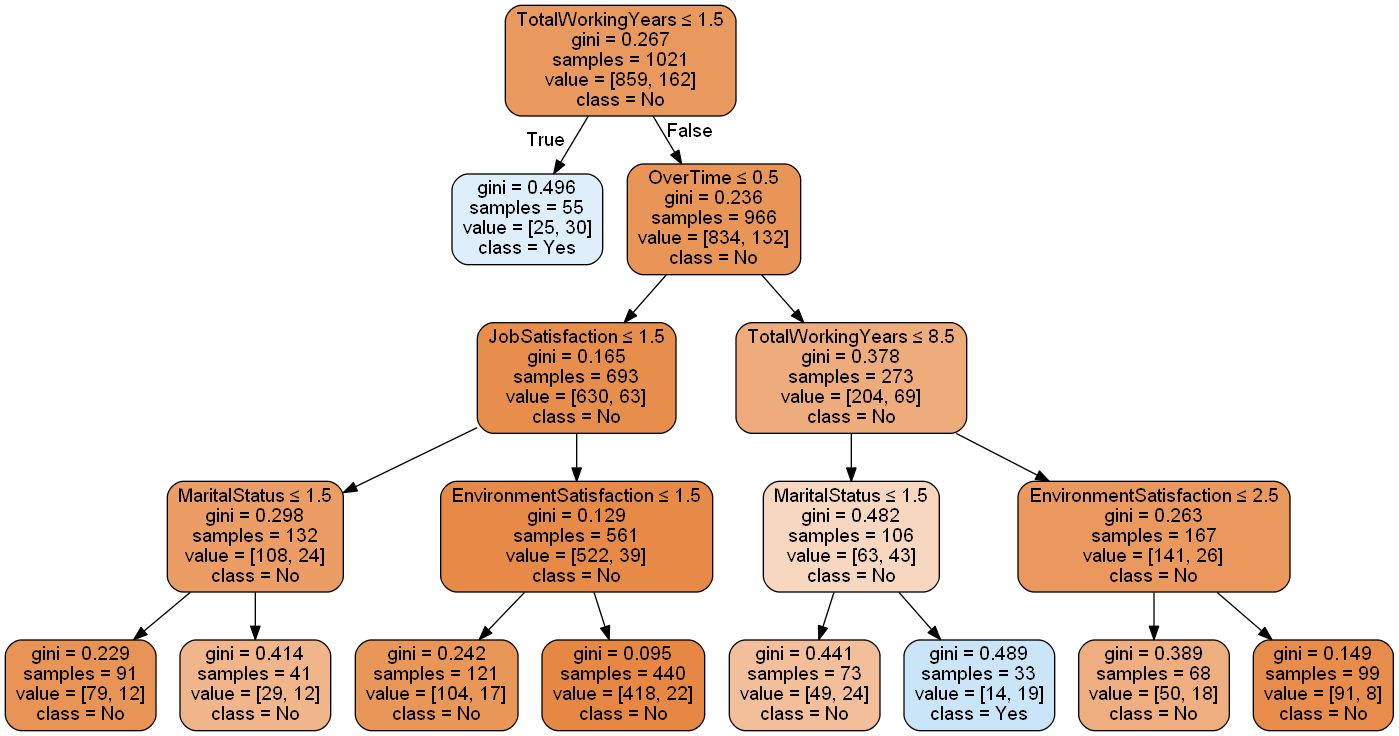

In [178]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes, 
                                class_names=clf.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

### Apply the decision tree on the TRAINING set

In [179]:
y_pred = clf.predict(X_train)

In [180]:
#Evaluate the performance
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))

#Print classification report
print(classification_report(y_train, y_pred))

#Confusion matrix
confusion_matrix(y_train, y_pred)

Accuracy 0.8511263467189031
F1-score [0.91517857 0.392     ]
              precision    recall  f1-score   support

          No       0.88      0.95      0.92       859
         Yes       0.56      0.30      0.39       162

    accuracy                           0.85      1021
   macro avg       0.72      0.63      0.65      1021
weighted avg       0.83      0.85      0.83      1021



array([[820,  39],
       [113,  49]], dtype=int64)

### Apply the decision tree on the TEST set 

In [181]:
y_pred = clf.predict(X_test)

In [182]:
#Evaluate the performance
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))

#Print classification report
print(classification_report(y_test, y_pred))

#Confusion matrix
confusion_matrix(y_test, y_pred)

Accuracy 0.8310502283105022
F1-score [0.90314136 0.33928571]
              precision    recall  f1-score   support

          No       0.87      0.94      0.90       368
         Yes       0.45      0.27      0.34        70

    accuracy                           0.83       438
   macro avg       0.66      0.60      0.62       438
weighted avg       0.80      0.83      0.81       438



array([[345,  23],
       [ 51,  19]], dtype=int64)

In [183]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

['No', 'Yes']

In [184]:
fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = lb.transform(y_pred)
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(by_test[:, i], by_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

0.6044642857142857

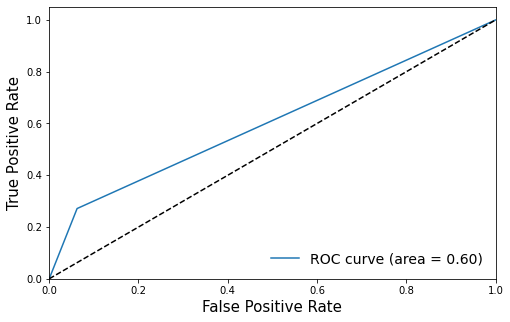

In [185]:
plt.figure(figsize=(8, 5))
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15) 
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

### CROSS VALIDATION

In [186]:
from sklearn.model_selection import cross_val_score

In [187]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8403 (+/- 0.03)
F1-score: 0.5549 (+/- 0.12)


### K-NEAREST NEIGHBORS

In [196]:
clf = KNeighborsClassifier(n_neighbors=7, weights="uniform")

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

clf.fit(X_train, y_train)

Accuracy: 0.8526 (+/- 0.02)
F1-score: 0.5957 (+/- 0.07)


KNeighborsClassifier(n_neighbors=7)

In [197]:
'''

uniform_accuracy = list()
distance_accuracy = list()
errore_accurary = list()

uniform_f1 = list()
distance_f1 = list()
errore_f1 = list()

for n in range(1, 30, 3):
    for w in ["uniform", "distance"]:
        print("n_neighbors:", n, "weights:" , w)
        clf = KNeighborsClassifier(n_neighbors=n, weights=w)

        scores = cross_val_score(clf, X, y, cv=10)
        print('Accuracy: %0.4f (+/- %0.2f)'%(scores.mean(), scores.std()*2))

        if w == "uniform":
            uniform_accuracy.append(scores.mean())
        else:
            distance_accuracy.append(scores.mean())

        
        scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
        print('F1-score: %0.4f (+/- %0.2f)'%(scores.mean(), scores.std()*2))
        print()
        
        if w == "uniform":
            uniform_f1.append(scores.mean())
        else:
            distance_f1.append(scores.mean())

plt.plot(range(1, 30, 3), uniform_accuracy, label="uniform")
plt.plot(range(1, 30, 3), distance_accuracy, label="distance")
plt.legend(title="Weights")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

plt.plot(range(1, 30, 3), uniform_f1, label="uniform")
plt.plot(range(1, 30, 3), distance_f1, label="distance")
plt.legend(title="Weights")
plt.xlabel("Number of neighbors")
plt.ylabel("F1-score")
plt.show()

'''

'\n\nuniform_accuracy = list()\ndistance_accuracy = list()\nerrore_accurary = list()\n\nuniform_f1 = list()\ndistance_f1 = list()\nerrore_f1 = list()\n\nfor n in range(1, 30, 3):\n    for w in ["uniform", "distance"]:\n        print("n_neighbors:", n, "weights:" , w)\n        clf = KNeighborsClassifier(n_neighbors=n, weights=w)\n\n        scores = cross_val_score(clf, X, y, cv=10)\n        print(\'Accuracy: %0.4f (+/- %0.2f)\'%(scores.mean(), scores.std()*2))\n\n        if w == "uniform":\n            uniform_accuracy.append(scores.mean())\n        else:\n            distance_accuracy.append(scores.mean())\n\n        \n        scores = cross_val_score(clf, X, y, cv=10, scoring=\'f1_macro\')\n        print(\'F1-score: %0.4f (+/- %0.2f)\'%(scores.mean(), scores.std()*2))\n        print()\n        \n        if w == "uniform":\n            uniform_f1.append(scores.mean())\n        else:\n            distance_f1.append(scores.mean())\n\nplt.plot(range(1, 30, 3), uniform_accuracy, label="uni

In [202]:
y_pred=clf.predict(X_train)
print("Training")
print(classification_report(y_train, y_pred))
print()
confusion_matrix(y_train, y_pred)

Training
              precision    recall  f1-score   support

          No       0.87      0.98      0.93       859
         Yes       0.76      0.25      0.38       162

    accuracy                           0.87      1021
   macro avg       0.82      0.62      0.65      1021
weighted avg       0.86      0.87      0.84      1021




array([[846,  13],
       [121,  41]], dtype=int64)

In [203]:
y_pred=clf.predict(X_test)
print("Test")
print(classification_report(y_test, y_pred))
print()
confusion_matrix(y_test, y_pred)

Test
              precision    recall  f1-score   support

          No       0.86      0.97      0.91       368
         Yes       0.45      0.14      0.22        70

    accuracy                           0.84       438
   macro avg       0.66      0.56      0.56       438
weighted avg       0.79      0.84      0.80       438




array([[356,  12],
       [ 60,  10]], dtype=int64)

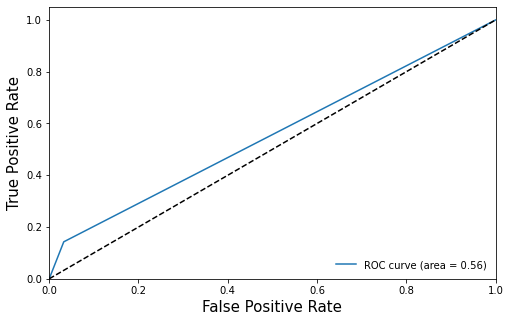

In [200]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = lb.transform(y_pred)
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(by_test[:, i], by_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

plt.figure(figsize=(8, 5))
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15) 
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(loc="lower right", fontsize=10, frameon=False)
plt.show()